In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
df=pd.read_csv(r"C:\Users\mdabi\Desktop\Task\task1\Titanic-Dataset.csv")


In [11]:
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [12]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)
df.drop(columns=['Cabin'], inplace=True)


In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


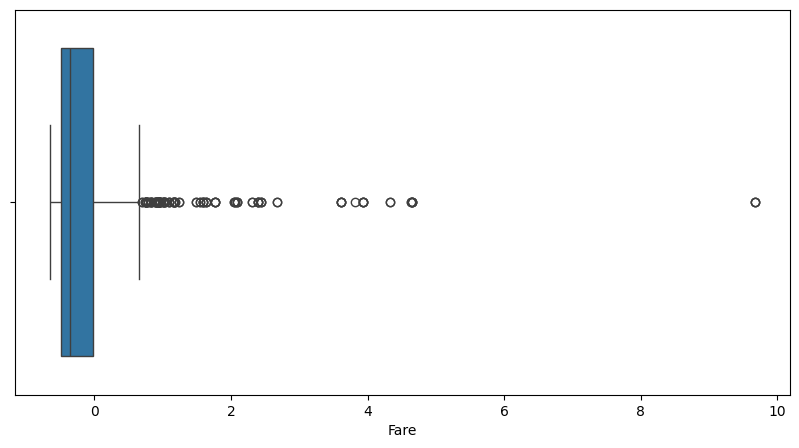

In [16]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fare'])
plt.show()


Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


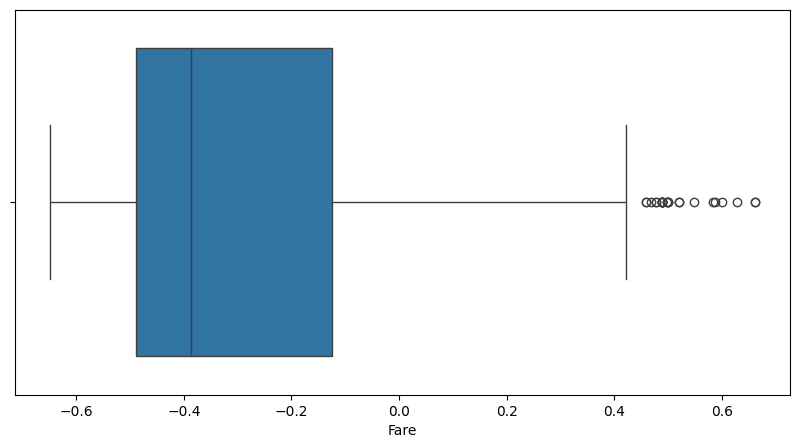

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fare'])
plt.show()